In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp

%matplotlib inline

import quandl

In [489]:
df = quandl.get("USTREASURY/YIELD")

In [490]:
df.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [491]:
df.count()

1 MO     4572
2 MO      267
3 MO     7468
6 MO     7471
1 YR     7471
2 YR     7471
3 YR     7471
5 YR     7471
7 YR     7471
10 YR    7471
20 YR    6532
30 YR    6477
dtype: int64

In [492]:
df = df.drop(["2 MO"],  axis =1)

In [493]:
df = df.drop(["1 MO"], axis = 1 )

In [494]:
df.count()

3 MO     7468
6 MO     7471
1 YR     7471
2 YR     7471
3 YR     7471
5 YR     7471
7 YR     7471
10 YR    7471
20 YR    6532
30 YR    6477
dtype: int64

In [495]:
df = df.dropna()

In [496]:
df.count()

3 MO     5535
6 MO     5535
1 YR     5535
2 YR     5535
3 YR     5535
5 YR     5535
7 YR     5535
10 YR    5535
20 YR    5535
30 YR    5535
dtype: int64

In [497]:
df.head()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,
1993-10-01,2.98,3.11,3.35,3.84,4.18,4.72,5.03,5.34,6.12,5.98
1993-10-04,3.02,3.17,3.35,3.85,4.16,4.71,5.04,5.34,6.10,5.99
1993-10-05,3.06,3.20,3.38,3.86,4.18,4.72,5.05,5.35,6.12,6.01
1993-10-06,3.04,3.19,3.36,3.85,4.16,4.70,5.05,5.35,6.12,6.01
1993-10-07,3.05,3.17,3.35,3.83,4.15,4.69,5.05,5.33,6.11,6.01


In [498]:
#def lambda_selection(t):
    #lamb_mat = np.arange( 1, 20.5, 0.5)
    #lamb_mat = np.reshape(lamb_mat,(-1,1))
    #lamb_mat = (np.ones_like(lamb_mat) -  np.exp(-t*lamb_mat))/((t*np.ones_like(lamb_mat)*(lamb_mat))) - np.exp(-t*lamb_mat) 
    #lamb = lamb_mat[2]
    
    #return lamb

In [516]:
import math

def constants(lamb, t):
    c1 = 1
    c2 = (1 - exp(-t * lamb))/(t * lamb)
    c3 = (1 - exp(-t * lamb))/(t * lamb) - exp(-t * lamb)
    
    return c1,c2,c3

In [517]:
a2y,b2y,c2y = constants(0.0609,24)

In [518]:
a10y,b10y,c10y = constants(.0609,120)

In [519]:
a20y,b20y,c20y = constants(.0609,240)
a1y,b1y,c1y = constants(.0609,12)
a3y,b3y,c3y = constants(.0609,36)
a5,b5,c5 = constants(.0609,60)
a7,b7,c7 = constants(.0609,84)
a3,b3,c3 = constants(.609,3)
a6,b6,c6 = constants(.609,6)

In [520]:
df['beta_0'] = 0
df['beta_1'] = 0
df['beta_2'] = 0

In [521]:
#def paramaters(a2,b2,c2,a10,b10,c10,a20,b20,c20):
#for i in range(len(df)):
 #   y1 = df['2 YR'].iloc[i]
  #  y2 = df['10 YR'].iloc[i]
   # y3 = df['20 YR'].iloc[i]
    #    
    #A = np.array([[a2,b2,c2],[a10,b10,c10],[a20,b20,c20]])
    #b = np.array([y1,y2,y3])
    #beta = np.linalg.solve(A,b)
    
    #df['beta_0'].iloc[i] = beta[0]
    #df['beta_1'].iloc[i] = beta[1]
    #df['beta_2'].iloc[i] = beta[2]

In [522]:
import statsmodels.api as sm
def parameters(a2y,b2y,c2y,a10y,b10y,c10y,a20y,b20y,c20y,a3y,b3y,c3y,a5,b5,c5,a7,b7,c7,a1y,b1y,c1y,a3,b3,c3,a6,b6,c6):
    for i in range(len(df)):
        y1 = df['2 YR'].iloc[i]
        y2 = df['10 YR'].iloc[i]
        y3 = df['20 YR'].iloc[i]
        y4 = df['3 YR'].iloc[i]
        y5 = df['5 YR'].iloc[i]
        y6 = df['7 YR'].iloc[i]
        y7 = df['1 YR'].iloc[i]
        y8 = df['3 MO'].iloc[i]
        y9 = df['6 MO'].iloc[i]
    
        y = np.array([y1,y2,y3,y4,y5,y6,y7,y8,y9])
        y = np.reshape(y,(-1,1))

        X = np.array([[a2y,b2y,c2y],[a10y,b10y,c10y],[a20y,b20y,c20y],[a3y,b3y,c3y],[a5,b5,c5],[a7,b7,c7],[a1y,b1y,c1y],
                      [a3,b3,c3],[a6,b6,c6]])

        X = sm.add_constant(X)

        est = sm.OLS(y,X)
        est = est.fit()

        df['beta_0'].iloc[i] = est.params[0]
        df['beta_1'].iloc[i] = est.params[1]
        df['beta_2'].iloc[i] = est.params[2]

In [523]:
parameters(a2y,b2y,c2y,a10y,b10y,c10y,a20y,b20y,c20y,a3y,b3y,c3y,a5,b5,c5,a7,b7,c7,a1y,b1y,c1y,a3,b3,c3,a6,b6,c6)

C:\Users\adity\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [524]:
df.head()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,beta_0,beta_1,beta_2
Date,,,,,,,,,,,,,
1993-10-01,2.98,3.11,3.35,3.84,4.18,4.72,5.03,5.34,6.12,5.98,6.666589,-1.943584,-7.765616
1993-10-04,3.02,3.17,3.35,3.85,4.16,4.71,5.04,5.34,6.10,5.99,6.644550,-1.975793,-7.581481
1993-10-05,3.06,3.20,3.38,3.86,4.18,4.72,5.05,5.35,6.12,6.01,6.656880,-1.952744,-7.581914
1993-10-06,3.04,3.19,3.36,3.85,4.16,4.70,5.05,5.35,6.12,6.01,6.664764,-1.969146,-7.642901
1993-10-07,3.05,3.17,3.35,3.83,4.15,4.69,5.05,5.33,6.11,6.01,6.649469,-1.970819,-7.616373


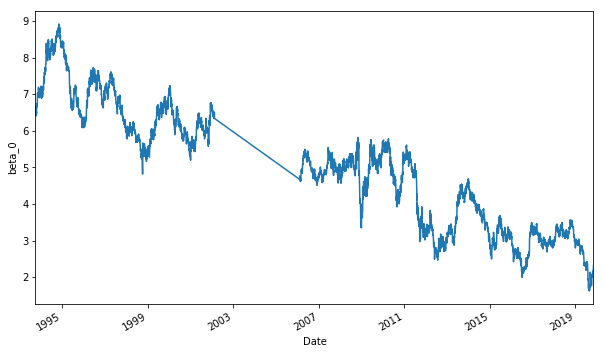

In [525]:
df['beta_0'].plot(figsize = (10,6))
plt.xlabel("Date")
plt.ylabel("beta_0")
plt.show()

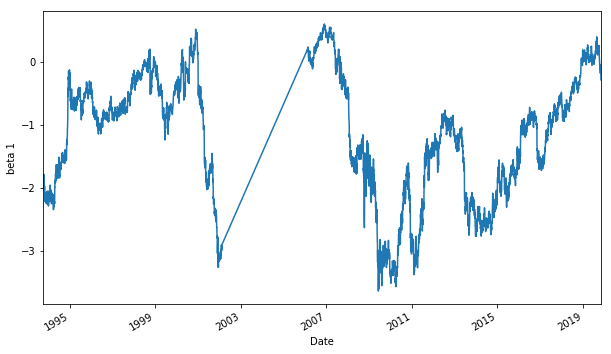

In [526]:
df['beta_1'].plot(figsize = (10,6))
plt.xlabel("Date")
plt.ylabel("beta 1")
plt.show()

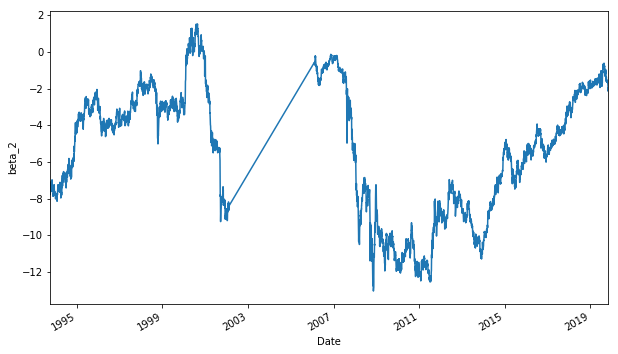

In [527]:
df['beta_2'].plot(figsize = (10,6))
plt.xlabel("Date")
plt.ylabel("beta_2")
plt.show()

In [535]:
#Normalising Data
df.iloc[:,10:]

,beta_0,beta_1,beta_2
Date,,,
1993-10-01,6.666589,-1.943584,-7.765616
1993-10-04,6.644550,-1.975793,-7.581481
1993-10-05,6.656880,-1.952744,-7.581914
1993-10-06,6.664764,-1.969146,-7.642901
1993-10-07,6.649469,-1.970819,-7.616373
1993-10-08,6.545628,-1.894209,-7.499517
1993-10-12,6.527610,-1.892367,-7.289945
1993-10-13,6.539198,-1.881196,-7.354424
1993-10-14,6.483738,-1.814924,-7.330177


In [536]:
from sklearn.preprocessing import MinMaxScaler

input_features = df.iloc[:,10:].values
input_data = input_features

In [540]:
sc = MinMaxScaler(feature_range = (0,1))
input_data[:,0:3] = sc.fit_transform(input_features[:,:])

In [541]:
input_data

array([[0.69120055, 0.39939833, 0.36212712],
       [0.68817898, 0.39179372, 0.37477972],
       [0.68986946, 0.39723564, 0.37475002],
       ...,
       [0.07320545, 0.83271101, 0.76154631],
       [0.09025215, 0.79352508, 0.76169083],
       [0.09581889, 0.79088629, 0.75230379]])

In [543]:
lookback = 50

test_size = int(.3*len(df))
X = []
y = []

for i  in range(len(df) - lookback - 1):
    t = []
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])

[[array([[0.69120055, 0.39939833, 0.36212712]]),
  array([[0.68817898, 0.39179372, 0.37477972]]),
  array([[0.68986946, 0.39723564, 0.37475002]]),
  array([[0.69095039, 0.39336303, 0.37055938]]),
  array([[0.68885344, 0.39296794, 0.37238221]]),
  array([[0.67461694, 0.4110563 , 0.38041179]]),
  array([[0.67214672, 0.41149113, 0.39481225]]),
  array([[0.67373547, 0.41412869, 0.39038168]]),
  array([[0.66613194, 0.42977604, 0.3920478 ]]),
  array([[0.6559695 , 0.43729325, 0.40382147]]),
  array([[0.66838769, 0.41613583, 0.4054289 ]]),
  array([[0.66702252, 0.41479926, 0.41015729]]),
  array([[0.66548514, 0.41999734, 0.40719021]]),
  array([[0.68115296, 0.39590119, 0.39961668]]),
  array([[0.6948548 , 0.38596298, 0.38434268]]),
  array([[0.70192612, 0.37774902, 0.3847326 ]]),
  array([[0.69504084, 0.38602238, 0.39184491]]),
  array([[0.69567593, 0.39090595, 0.39411238]]),
  array([[0.69025022, 0.39300281, 0.40065445]]),
  array([[0.69273895, 0.39055744, 0.39851217]]),
  array([[0.704174  

In [545]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 3)
X_test = X_test.reshape(X_test.shape[0],lookback, 3)
print(X.shape)
print(X_test.shape)

(5484, 50, 3)
(1710, 50, 3)
